### Ridge regression for one feature.

In [7]:
import matplotlib.pyplot as plt 
import numpy as np


from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

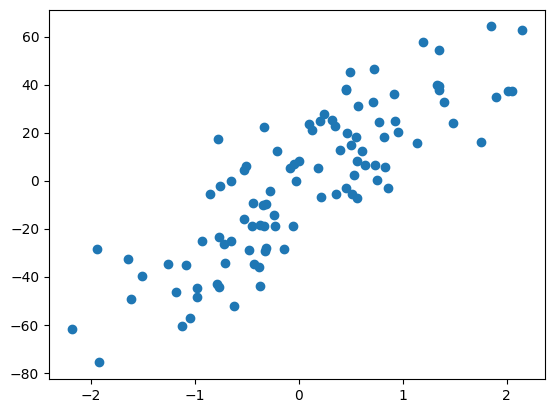

In [6]:
plt.scatter(X, y)
plt.show()

In [24]:
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [25]:
print(lr_model.coef_)
print(lr_model.intercept_)

[27.82809103]
-2.29474455867698


### Apply Ridge regreesion using sklearn.

In [26]:
from sklearn.linear_model import Ridge

In [43]:
rd_model = Ridge(alpha=10)

rd_model.fit(X, y)

Ridge(alpha=10)

In [44]:
print(rd_model.coef_)
print(rd_model.intercept_)

[24.9546267]
-2.1269130035235735


### Now build own ridge class for one feature.

In [60]:
class MyRidge:

    def __init__(self, alpha = 0.1): 
        self.alpha = alpha
        self.coef_ = None 
        self.intercept_ = None 

    def fit(self, X_train, y_train): 

        num = 0 
        den = 0 
        
        for i in range(X_train.shape[0]):
            num = num + np.dot((y_train[i] - np.mean(y_train)), (X_train[i] - np.mean(X_train))) 
            den = den + np.dot((X_train[i] - np.mean(X_train)), (X_train[i] - np.mean(X_train)))
            # num = num + (y_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
            # den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
        
        self.coef_ = num / (den + self.alpha) 
        self.intercept_ = np.mean(y_train) - self.coef_ * np.mean(X_train)

    def predict(self, X_test): 
        y_pred = self.coef_ * X_test + self.intercept_

In [61]:
my_model = MyRidge(10)
my_model.fit(X, y)

In [62]:
print(my_model.coef_)
print(my_model.intercept_)

[24.9546267]
[-2.126913]


### Ridge Regression uaing sklearn for n-features.

In [69]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

In [70]:
X,y = load_diabetes(return_X_y=True)

In [71]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [73]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [148]:
rd_model = Ridge(alpha=0.1, solver='cholesky')
rd_model.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [149]:
r2_score(y_test, rd_model.predict(X_test))

0.45199494197195456

In [150]:
print(rd_model.coef_)
print(rd_model.intercept_)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.92546856900984


### Now build own ridge class for n-feature using OLS(Ordinary Least Square).

In [156]:
class MyRidge: 

    def __init__(self, alpha = 0.1): 
        self.alpha = alpha
        self.coef_ = None 
        self.intercept_ = None 

    def fit(self, X_train, y_train): 
        X_train = np.insert(X_train, 0, 1, axis = 1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I), X_train.T), y_train) 
        # print(result)
        self.intercept_ = result[0]
        self.coef_ = result[1 : ]

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [157]:
my_ridge = MyRidge(0.1)
my_ridge.fit(X_train, y_train)

In [158]:
r2_score(y_test, my_ridge.predict(X_test))

0.45199494197195467

In [159]:
print(my_ridge.coef_)
print(my_ridge.intercept_)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.9254685690099
